 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col = "Date",infer_datetime_format=True, parse_dates=True)
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = "Date",infer_datetime_format=True, parse_dates=True)
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head(5)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = "Date",infer_datetime_format=True, parse_dates=True)
sp500_df.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes['Close']

dtype('O')

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df["Close"] = pd.to_numeric(sp500_df["Close"])
sp500_df.dtypes['Close']

<ipython-input-10-311ab851f151>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


dtype('float64')

In [11]:
# Calculate Daily Returns
sp500_daily_return = sp500_df.pct_change()
sp500_daily_return.head(5)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_daily_return = sp500_daily_return.dropna()
sp500_daily_return.head(3)

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_return.rename(columns = {'Close':'Daily_returns'}, inplace = True)
sp500_daily_return.head(3)

,Daily_returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_data = pd.concat([sp500_daily_return, algo_df, whale_df], axis= 'columns', join = 'inner')
combined_data.head()

,Daily_returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily returns of all portfolios'}, xlabel='Date'>

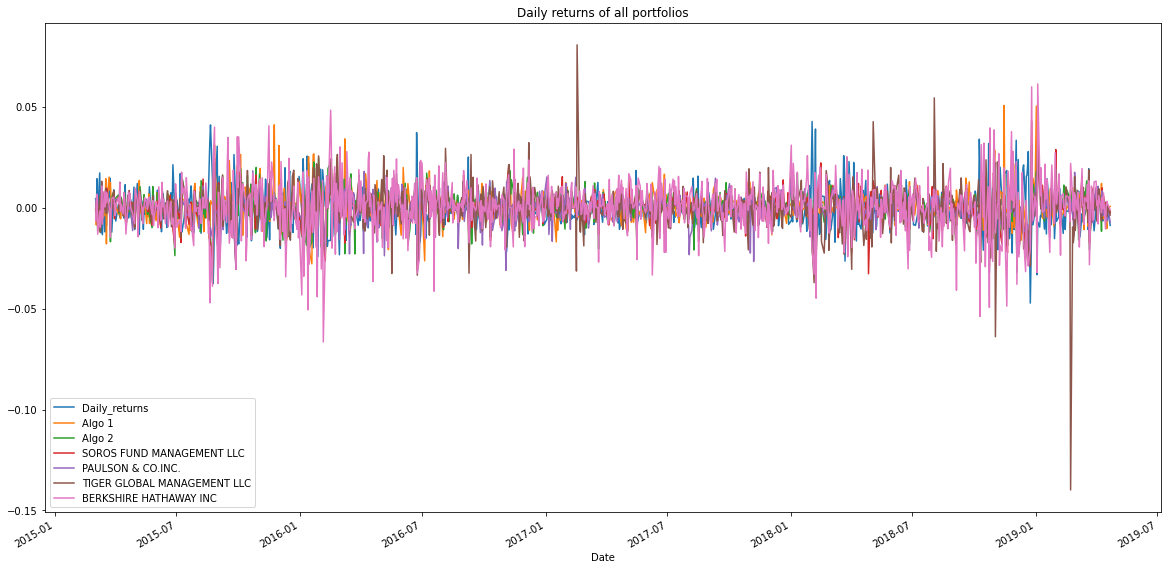

In [15]:
# Plot daily returns of all portfolios
combined_data.plot(title="Daily returns of all portfolios", figsize=(20, 10))

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_data).cumprod() 
cumulative_returns.head()

,Daily_returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-22,0.991236,1.000677,0.998064,0.997414,0.992667,0.996360,0.998912
2019-04-18,0.990234,1.000088,0.996837,0.998858,0.993880,0.996939,1.000826
2019-04-17,0.988673,0.989786,0.991626,0.995965,0.987453,0.992543,1.004051
2019-04-16,0.990926,0.982913,0.994501,0.998654,0.987836,0.991718,1.004891
2019-04-15,0.990422,0.978655,0.989954,0.997233,0.986694,0.992113,0.994347


<AxesSubplot:title={'center':'Cumulative returns of all portfolios'}, xlabel='Date'>

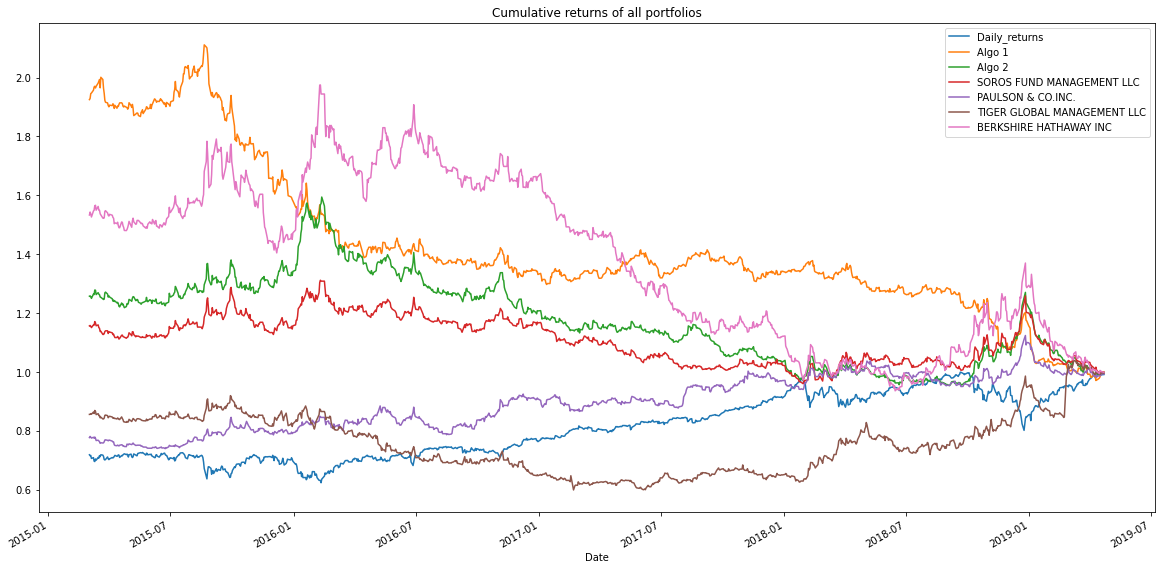

In [17]:
# Plot cumulative returns
cumulative_returns.plot(title="Cumulative returns of all portfolios", figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

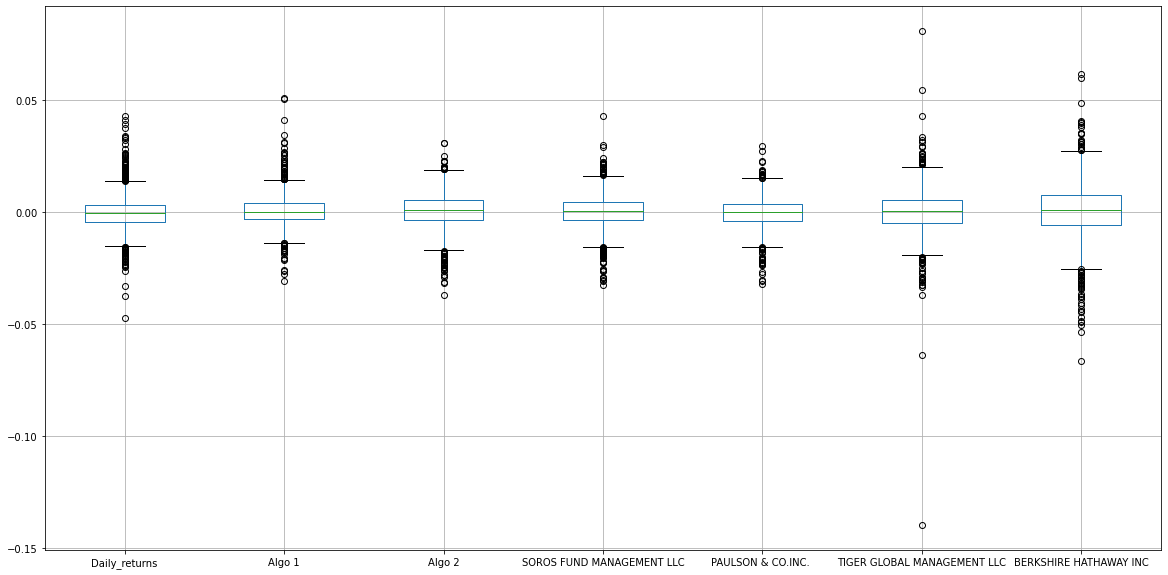

In [18]:
# Box plot to visually show risk
combined_data.boxplot(figsize=(20, 10))

<AxesSubplot:>

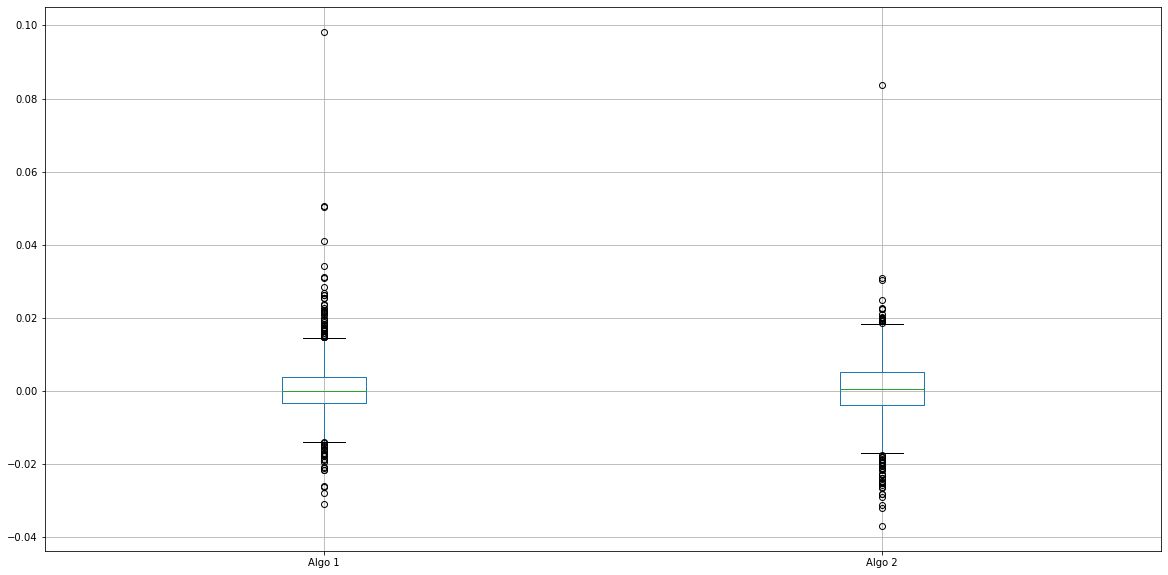

In [19]:
algo_df.boxplot(figsize=(20, 10))

<AxesSubplot:>

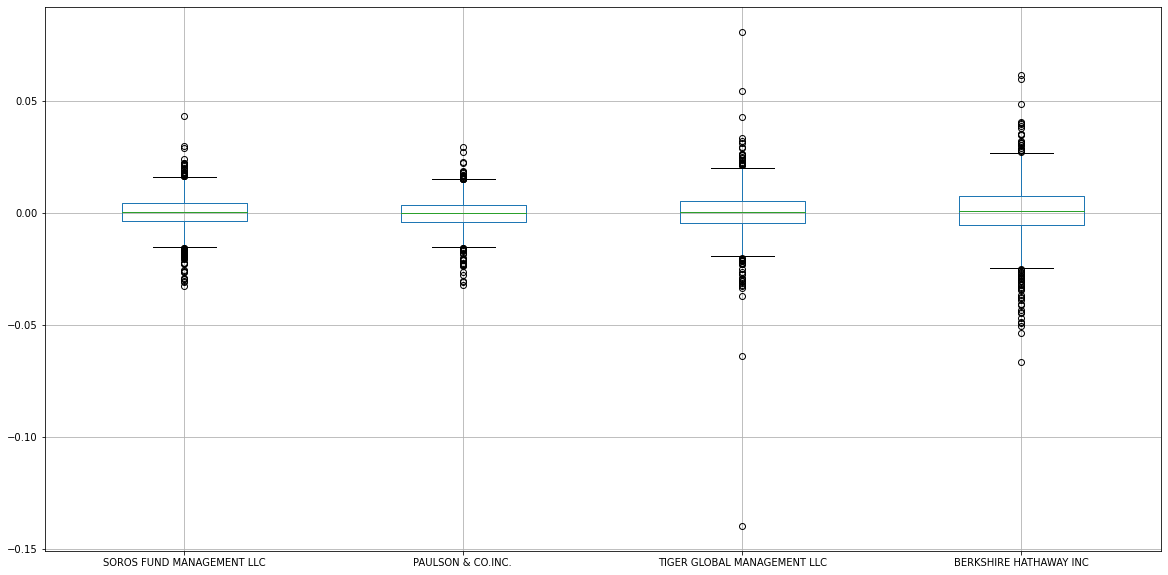

In [20]:
whale_df.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
whale_volatility = whale_df.std() 
algo_volatility = algo_df.std() 
whale_volatility

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [22]:
combined_data_std = combined_data.std()
combined_data_std

Daily_returns                  0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
SP500_std = combined_data['Daily_returns'].std() 

# Determine which portfolios are riskier than the S&P 500
combined_data_std > SP500_std 

Daily_returns                  False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC are considered riskier than the S&P 500.

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized standard deviation (252 trading days)
SP500_std_annualized = combined_data.std()*252
round(SP500_std_annualized, 4)

Daily_returns                  2.1639
Algo 1                         1.9209
Algo 2                         2.1020
SOROS FUND MANAGEMENT LLC      1.9898
PAULSON & CO.INC.              1.7704
TIGER GLOBAL MANAGEMENT LLC    2.7461
BERKSHIRE HATHAWAY INC         3.2555
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 day rolling standard deviation for all portfolios'}, xlabel='Date'>

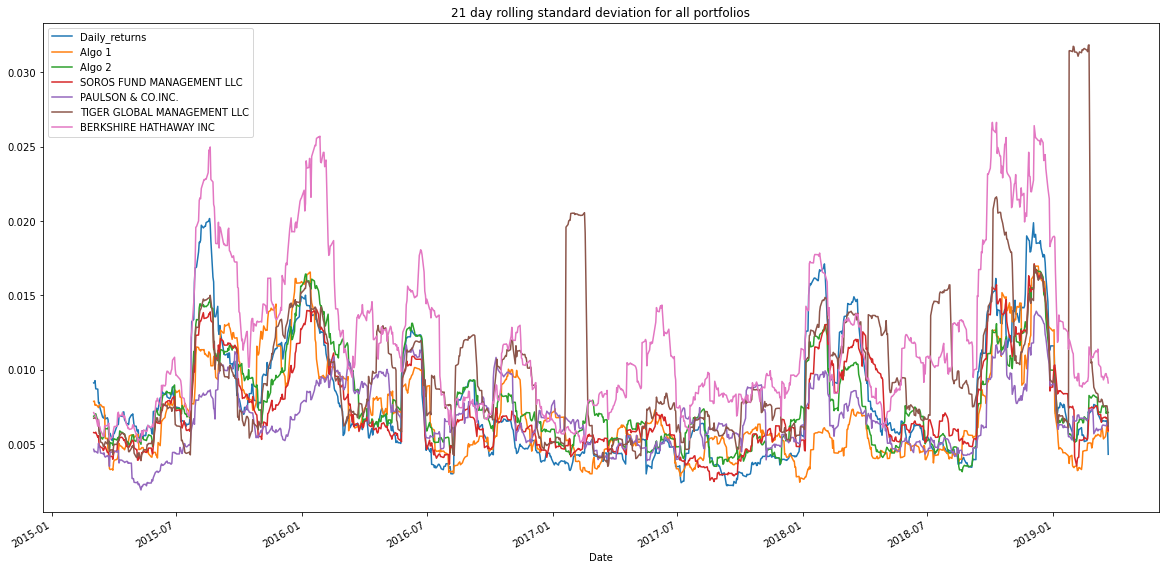

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_std_21 = combined_data.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_std_21.plot(title="21 day rolling standard deviation for all portfolios", figsize=(20, 10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = combined_data.corr()

# Display the correlation matrix
correlation

,Daily_returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Daily_returns,1.000000,-0.033963,-0.002192,0.000574,0.013549,-0.001505,-0.013856
Algo 1,-0.033963,1.000000,0.287852,0.320901,0.268631,0.164114,0.291678
Algo 2,-0.002192,0.287852,1.000000,0.826730,0.678085,0.507160,0.687756
SOROS FUND MANAGEMENT LLC,0.000574,0.320901,0.826730,1.000000,0.699823,0.561040,0.754157
PAULSON & CO.INC.,0.013549,0.268631,0.678085,0.699823,1.000000,0.434308,0.545451
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.164114,0.507160,0.561040,0.434308,1.000000,0.424125
BERKSHIRE HATHAWAY INC,-0.013856,0.291678,0.687756,0.754157,0.545451,0.424125,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_data['Algo 1'].cov(combined_data['Daily_returns'])

# Calculate variance of S&P 500
sp500_variance = combined_data['Daily_returns'].var()

# Computing beta
algo1_beta = algo1_covariance / sp500_variance

<AxesSubplot:title={'center':'60 day rolling Beta: Algo1 and SP500'}, xlabel='Date'>

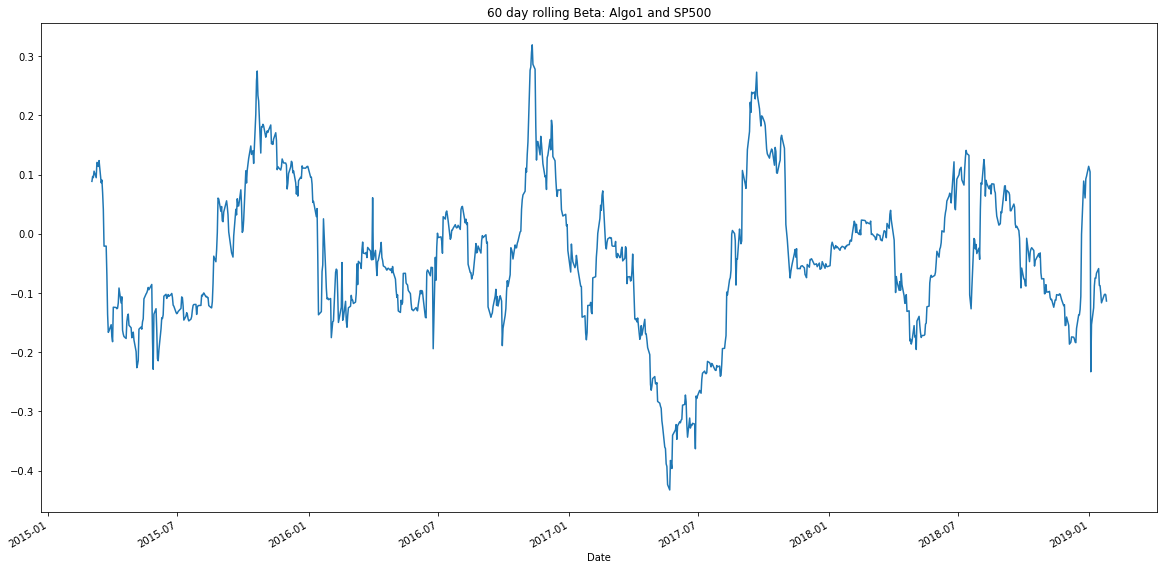

In [28]:
# Plot beta trend
"""To do this, ill need to create a 60 day rolling covarience between Algo 1 portfolio and the SP500. Calculate 
the 60 day rolling variance of SP500, from there I can calculate the 60 day rolling beta of Algo 1 and SP500.
This will enable me to be able to plot beta"""
#60 day rolling covariance
rolling_algo1_covariance = combined_data['Algo 1'].rolling(window=60).cov(combined_data['Daily_returns'])

# 60 day rolling variance
rolling_sp500_variance = combined_data['Daily_returns'].rolling(window=60).var()

# 60 day rolling Beta between Algo 1 and SP500
algo1_rolling_beta = rolling_algo1_covariance / rolling_sp500_variance

# Plot the 60 day beta trend
algo1_rolling_beta.plot(title="60 day rolling Beta: Algo1 and SP500", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

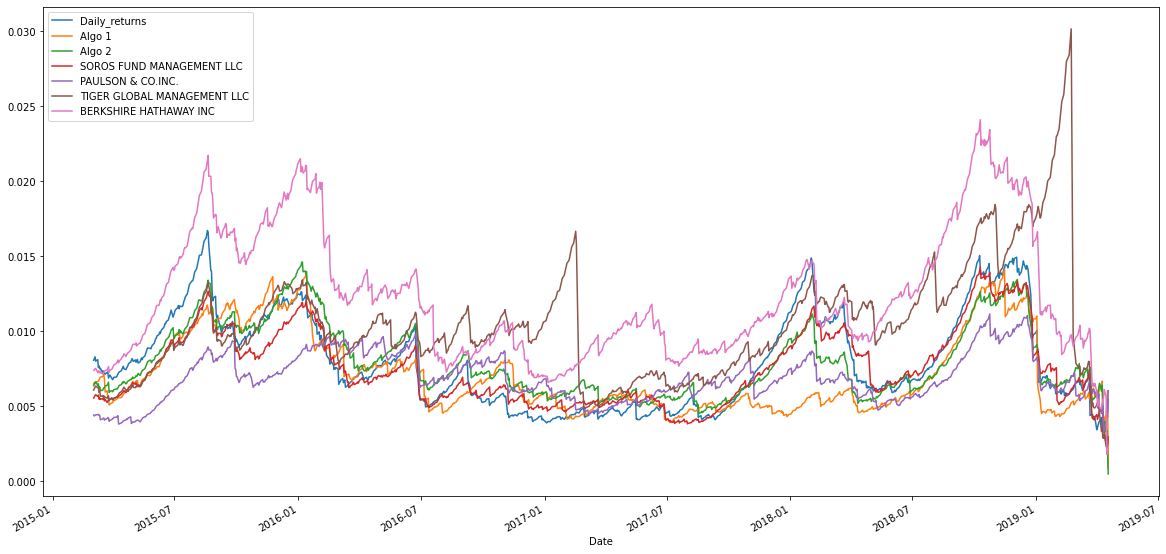

In [29]:
# Use `ewm` to calculate the rolling window
combined_data.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios 
""" Using Algo 1 portfolios and BERKSHIRE HATHAWAY INC as they are the two highest performing portfolios according
to the culmative returns table """

sharpe_ratio_bhi = (combined_data['BERKSHIRE HATHAWAY INC'].mean() * 252) / (combined_data['BERKSHIRE HATHAWAY INC'].std() * np.sqrt(252))
sharpe_ratio_algo = (combined_data['Algo 1'].mean() * 252) / (combined_data['Algo 1'].std() * np.sqrt(252))
print("Algo 1 sharpe ratio is", round(sharpe_ratio_algo,4))
print("BERKSHIRE HATHAWAY INC sharpe ratio is", round(sharpe_ratio_bhi,4))      

Algo 1 sharpe ratio is 1.3696
BERKSHIRE HATHAWAY INC sharpe ratio is 0.6067


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both the Algo portfolios outperformed the market, with Algo 1 portfolio being the best performer of the lot. Algo 2 also performed well, with only one of the whale portfolios beating it. The standard deviation on both the algo portfolios was relativley low as well, with Algo 1 being lower than the market, and both being below the average standard deviation. 

Overall, the algo portfolios out performed both the market and whale portfolios, and would have been a sound investment

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [31]:
# Reading data from 1st stock
goog_path = Path("Resources/GOOG.csv")
goog_df = pd.read_csv(goog_path, index_col = "Date",infer_datetime_format=True, parse_dates=True)
goog_df.head(5)

,Close
Date,
2019-04-23,1482.959961
2019-04-22,1474.449951
2019-04-18,1464.969971
2019-04-17,1473.609985
2019-04-16,1500.099976


In [32]:
# Reading data from 2nd stock
cost_path = Path("Resources/COST.csv")
cost_df = pd.read_csv(cost_path, index_col = "Date",infer_datetime_format=True, parse_dates=True)
cost_df.head(5)

,Close
Date,
2019-04-23,325.529999
2019-04-22,329.320007
2019-04-18,339.790009
2019-04-17,339.970001
2019-04-16,343.309998


In [33]:
# Reading data from 3rd stock
aapl_path = Path("Resources/AAPL.csv")
aapl_df = pd.read_csv(aapl_path, index_col = "Date",infer_datetime_format=True, parse_dates=True)
aapl_df.head(5)

,Close
Date,
2019-04-23,106.260002
2019-04-22,108.937500
2019-04-18,109.665001
2019-04-17,110.062500
2019-04-16,113.902496


In [34]:
# Combine all stocks in a single DataFrame and Reorganize portfolio data by having a column per symbol
custom_df = pd.concat([goog_df, cost_df, aapl_df], axis= 'columns', join = 'inner')
custom_df.columns = ['GOOG', 'COST', 'AAPL']
custom_df.head()

,GOOG,COST,AAPL
Date,,,
2019-04-23,1482.959961,325.529999,106.260002
2019-04-22,1474.449951,329.320007,108.937500
2019-04-18,1464.969971,339.790009,109.665001
2019-04-17,1473.609985,339.970001,110.062500
2019-04-16,1500.099976,343.309998,113.902496


In [35]:
# Calculate daily returns and Drop NAs
custom_df = custom_df.pct_change().dropna()

# Display sample data
custom_df.head()

,GOOG,COST,AAPL
Date,,,
2019-04-22,-0.005739,0.011643,0.025198
2019-04-18,-0.006430,0.031793,0.006678
2019-04-17,0.005898,0.000530,0.003625
2019-04-16,0.017976,0.009824,0.034889
2019-04-15,-0.003740,-0.006991,-0.024495


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [.33, .33, .33]

# Calculate portfolio return
custom_df = custom_df.dot(weights)
custom_df.column = ["Kanes_portfolio"]
# Display sample data
custom_df.head()

Date
2019-04-22    0.010264
2019-04-18    0.010574
2019-04-17    0.003317
2019-04-16    0.020688
2019-04-15   -0.011624
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
custom_combined_portfolio = pd.concat([custom_df, combined_data], axis= 'columns', join = 'inner')
custom_combined_portfolio.columns = ['Kanes_personal', 'Daily_returns', 'Algo_1', 'Algo_2', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']
custom_combined_portfolio.head()

,Kanes_personal,Daily_returns,Algo_1,Algo_2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2019-04-22,0.010264,-0.008764,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,0.010574,-0.001011,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,0.003317,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,0.020688,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-15,-0.011624,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
custom_combined_portfolio.dropna()
custom_combined_portfolio.isnull().sum()

Kanes_personal                 0
Daily_returns                  0
Algo_1                         0
Algo_2                         0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [47]:
"""cumulative returns on combined profolio using cumprod"""
cum_custom_combined_portfolio = (1 + custom_combined_portfolio).cumprod() 
cum_custom_combined_portfolio.head()

,Kanes_personal,Daily_returns,Algo_1,Algo_2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2019-04-22,1.010264,0.991236,1.000677,0.998064,0.997414,0.992667,0.996360,0.998912
2019-04-18,1.020946,0.990234,1.000088,0.996837,0.998858,0.993880,0.996939,1.000826
2019-04-17,1.024332,0.988673,0.989786,0.991626,0.995965,0.987453,0.992543,1.004051
2019-04-16,1.045523,0.990926,0.982913,0.994501,0.998654,0.987836,0.991718,1.004891
2019-04-15,1.033370,0.990422,0.978655,0.989954,0.997233,0.986694,0.992113,0.994347


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
ccp_std = custom_combined_portfolio.std()*252
ccp_std

Kanes_personal                 3.321846
Daily_returns                  2.387930
Algo_1                         2.075651
Algo_2                         2.166706
SOROS FUND MANAGEMENT LLC      2.358618
PAULSON & CO.INC.              1.852146
TIGER GLOBAL MANAGEMENT LLC    3.694471
BERKSHIRE HATHAWAY INC         3.834778
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 day rolling standard deviation for combined portfolios'}, xlabel='Date'>

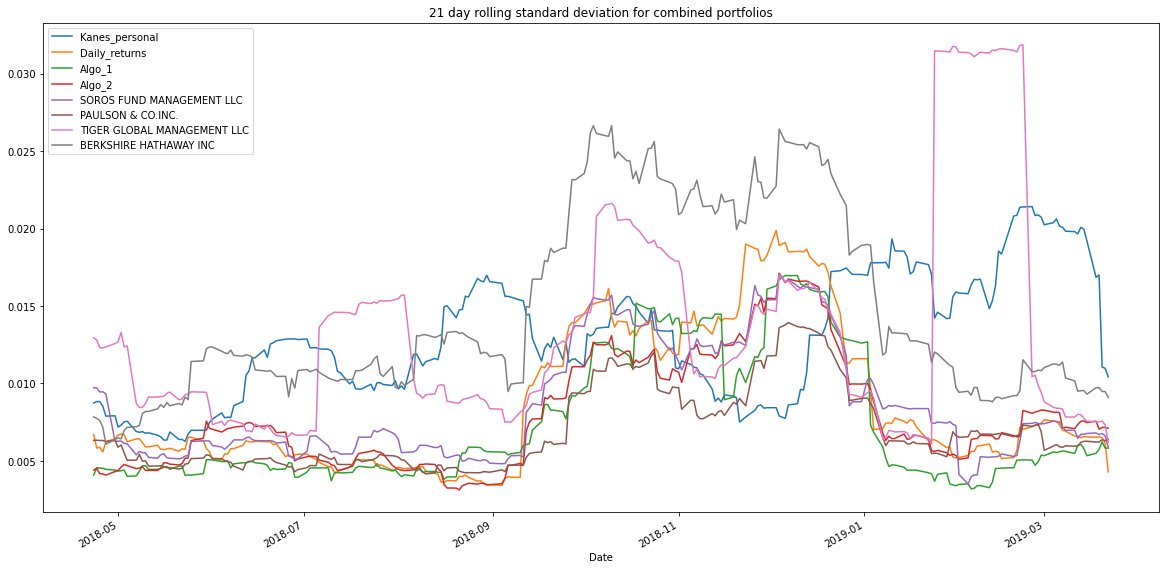

In [40]:
# Calculate rolling standard deviation
ccp_21day_std = custom_combined_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
ccp_21day_std.plot(title="21 day rolling standard deviation for combined portfolios", figsize=(20, 10))

### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation
combined_correlation = custom_combined_portfolio.corr()
combined_correlation

,Kanes_personal,Daily_returns,Algo_1,Algo_2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Kanes_personal,1.000000,-0.089848,-0.046535,0.033568,0.012414,-0.017435,-0.012678,0.030585
Daily_returns,-0.089848,1.000000,-0.052139,-0.045149,-0.032157,-0.048589,-0.006407,-0.038695
Algo_1,-0.046535,-0.052139,1.000000,0.356067,0.323535,0.345349,0.109885,0.319862
Algo_2,0.033568,-0.045149,0.356067,1.000000,0.830868,0.773429,0.412901,0.780616
SOROS FUND MANAGEMENT LLC,0.012414,-0.032157,0.323535,0.830868,1.000000,0.760562,0.468553,0.795376
PAULSON & CO.INC.,-0.017435,-0.048589,0.345349,0.773429,0.760562,1.000000,0.486202,0.638154
TIGER GLOBAL MANAGEMENT LLC,-0.012678,-0.006407,0.109885,0.412901,0.468553,0.486202,1.000000,0.326404
BERKSHIRE HATHAWAY INC,0.030585,-0.038695,0.319862,0.780616,0.795376,0.638154,0.326404,1.000000


<AxesSubplot:title={'center':'21 day rolling standard deviation for combined portfolios'}>

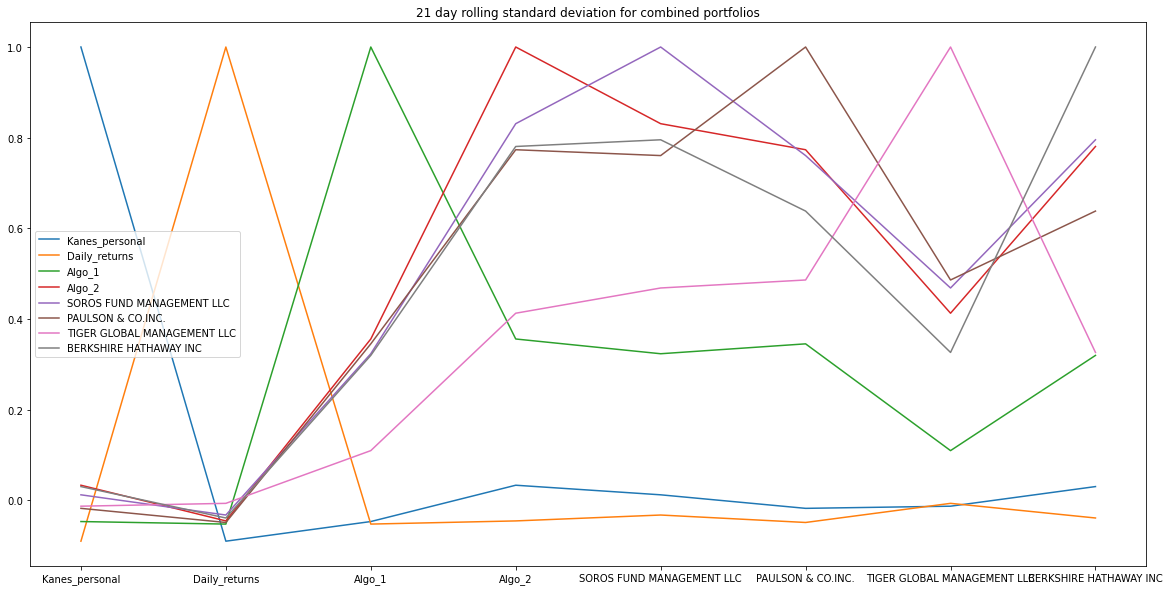

In [42]:
"""Plot the correlation"""
combined_correlation.plot(title="21 day rolling standard deviation for combined portfolios", figsize=(20, 10))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 day rolling Beta: Kanes personal portfolio and SP500'}, xlabel='Date'>

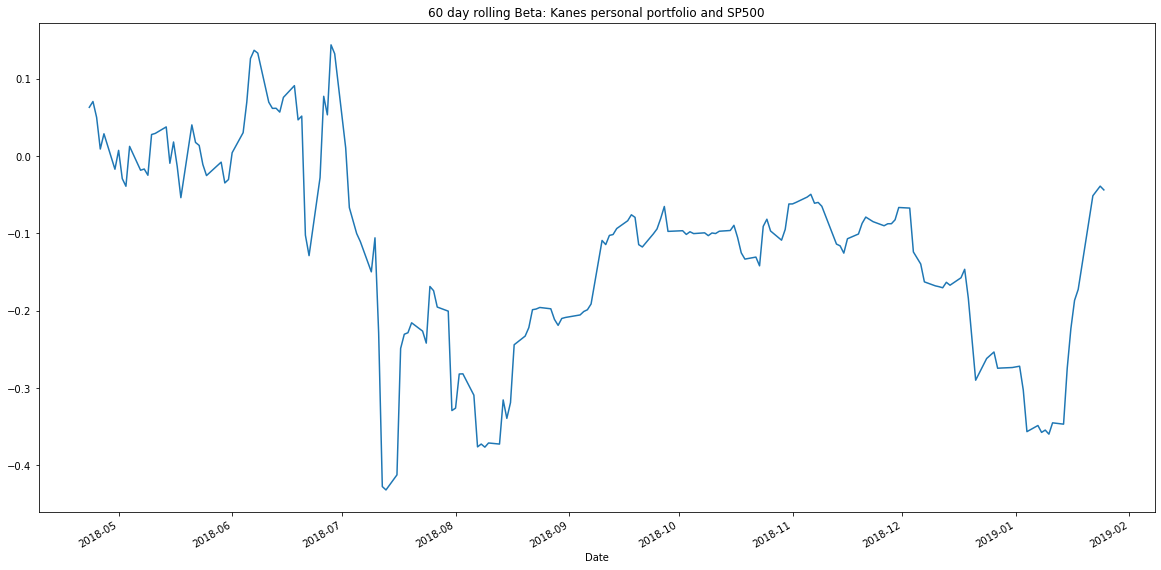

In [43]:
# Calculate and plot Beta
"""To do this, ill need to create a 60 day rolling covarience between Algo 1 portfolio and the SP500. Calculate 
the 60 day rolling variance of SP500, from there I can calculate the 60 day rolling beta of Algo 1 and SP500.
This will enable me to be able to plot beta"""
#60 day rolling covariance
rolling_personal_covariance = custom_combined_portfolio['Kanes_personal'].rolling(window=60).cov(custom_combined_portfolio['Daily_returns'])

# 60 day rolling variance
rolling_sp500_variance_1y = custom_combined_portfolio['Daily_returns'].rolling(window=60).var()

# 60 day rolling Beta between Algo 1 and SP500
personal_rolling_beta = rolling_personal_covariance / rolling_sp500_variance_1y

# Plot the 60 day beta trend
personal_rolling_beta.plot(title="60 day rolling Beta: Kanes personal portfolio and SP500", figsize=(20, 10))


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_kane = (custom_combined_portfolio['Kanes_personal'].mean() * 252) / (custom_combined_portfolio['Kanes_personal'].std() * np.sqrt(252))
sharpe_ratio_snp = (custom_combined_portfolio['Daily_returns'].mean() * 252) / (custom_combined_portfolio['Daily_returns'].std() * np.sqrt(252))
sharpe_ratio_AG1 = (custom_combined_portfolio['Algo_1'].mean() * 252) / (custom_combined_portfolio['Algo_1'].std() * np.sqrt(252))
sharpe_ratio_AG2 = (custom_combined_portfolio['Algo_2'].mean() * 252) / (custom_combined_portfolio['Algo_2'].std() * np.sqrt(252))
sharpe_ratio_soros = (custom_combined_portfolio['SOROS FUND MANAGEMENT LLC'].mean() * 252) / (custom_combined_portfolio['SOROS FUND MANAGEMENT LLC'].std() * np.sqrt(252))
sharpe_ratio_paulson = (custom_combined_portfolio['PAULSON & CO.INC.'].mean() * 252) / (custom_combined_portfolio['PAULSON & CO.INC.'].std() * np.sqrt(252))
sharpe_ratio_tiger = (custom_combined_portfolio['TIGER GLOBAL MANAGEMENT LLC'].mean() * 252) / (custom_combined_portfolio['TIGER GLOBAL MANAGEMENT LLC'].std() * np.sqrt(252))
sharpe_ratio_berks = (custom_combined_portfolio['BERKSHIRE HATHAWAY INC'].mean() * 252) / (custom_combined_portfolio['BERKSHIRE HATHAWAY INC'].std() * np.sqrt(252))


print('Kanes personal portfolio sharpe ratio is', round(sharpe_ratio_kane, 4))
print('S&P500 sharpe ratio is', round(sharpe_ratio_snp, 4))
print('Algo 1 sharpe ratio is', round(sharpe_ratio_AG1, 4))
print('Algo 2 sharpe ratio is', round(sharpe_ratio_AG2, 4))
print('SOROS FUND MANAGEMENT LLC sharpe ratio is', round(sharpe_ratio_soros, 4))
print('PAULSON & CO.INC. sharpe ratio is', round(sharpe_ratio_paulson, 4))
print('TIGER GLOBAL MANAGEMENT LLC sharpe ratio is', round(sharpe_ratio_tiger, 4))
print('BERKSHIRE HATHAWAY INC sharpe ratio is', round(sharpe_ratio_berks, 4))

Kanes personal portfolio sharpe ratio is 2.0595
S&P500 sharpe ratio is -0.5529
Algo 1 sharpe ratio is 2.1523
Algo 2 sharpe ratio is 0.0631
SOROS FUND MANAGEMENT LLC sharpe ratio is 0.261
PAULSON & CO.INC. sharpe ratio is 0.0769
TIGER GLOBAL MANAGEMENT LLC sharpe ratio is -0.9285
BERKSHIRE HATHAWAY INC sharpe ratio is 0.1429


### How does your portfolio do?

The custom portfolio made up of the three stocks did well compared to both the market and the other portfolios. 
Its returns are the second highest out of all the portfolios, this includes outperforming the market. Though the standard deviation is quite high which could explain the high returns, and is a cause of concern.ITs uncorelated to the market which is good from a diversification point of veiw. The sharpe ratio of 2.05 is also good, and once again, the second highest in the portfolios. 

Overall the custom portfolio performed well. 